## Question 4: Implementation of Deep  neural netwrok for classification.

(a) Test your network with two 1D problems; that is, your input is just a scalar. First, choose two sets of points that are linearly separable. Vary the margin between the points and the number of layers in the network. Is it more dif- ficult to find hyperparameters that solve a problem with a smaller margin? Does the speed with which the network converges to a good solution de- pends on the margin? Include a plot to support your answer to the second question. Second, test your network with some 1D data that is not linearly separable. What differences do you observe?

**Sol:** Here we implement designing a deep neural network for classification.  
#### Loss Function
Loss function as given in the question.

#### Input 
Points that are linearly separable with a margin.

#### Outputs 
**1-D data**
The oputputs for 1D linearly separable data is generated by x>5 for lower margin and x>25 for higher margin.
For linearly inseaparable data, the function y = sin(x) is used.

**Higher Dimensional Data (here n=3)**
For Linearly Seperable, I have used equation of a plane.
x1+x2+x3 +c = 0
For Linearly Inseaparable, I have used equation of a circle. x1^2 + x2^2 = r^2
#### Hyper Paramters
For this function there are four hyper paramters, that is the **Learning Rate** (Step Size), the number of **epochs** , the number of **hidden layers** and the number of **hidden units** in each hidden layer.


#### The Netwrok has 6 main Functions
1) Network Initialization
2) nonlin 
3) feed_forward
4) back_prop
5) update_network 
6) train

**Now lets got thorugh each function**


In [1]:
## Initialize the Network
def initialize_network(n_inputs,dimension, hidden_in_each_layer,x,y):
## Initializing Weights and Biases by using dictionary
    n_hidden_layers = len(hidden_in_each_layer)
    wts={'w1':np.random.randn(dimension,hidden_in_each_layer[0]) }
    b = {'b1':np.random.randn(hidden_in_each_layer[0],1)}
    for i in range(n_hidden_layers-1):
        wts['w'+str(i+2)]= np.random.randn(hidden_in_each_layer[i],hidden_in_each_layer[i+1])      
        b['b'+str(i+2)] = np.random.randn(hidden_in_each_layer[i+1],1)
    wts['w'+str(n_hidden_layers+1)] = np.random.randn(hidden_in_each_layer[-1],1) 
    b['b'+str(n_hidden_layers+1)] = np.random.randn(1)
    return x,y,wts,b

## Non Linear Function RELU
def nonlin(x, deriv = False):
    if (deriv == True):
        return 1*(x>0)
    return np.maximum(0,x)

## Activation function for the final layer
def transfer(activation):
    return 1.0 / (1.0 + np.exp(-activation))

def transfer_derivative(output):
    return output * (1.0 - output)

## Feed Forward Function
def feed_forward(x,wts,b):
    a = {'a1':(x.dot(wts['w1']).transpose() + b['b1']).transpose()}
    for i in range(len(wts)-2):
        a['a'+str(i+2)] = nonlin((a['a'+str(i+1)].dot(wts['w'+str(i+2)]).transpose() + b['b'+str(i+2)]).transpose())
    a['al'] = transfer(a['a'+str(len(wts)-1)].dot(wts['w'+str(len(wts))])+ b['b'+str(len(wts))]) 
    return a

## Back Propogation by appling the four main formulas of back propogation
def back_prop(x,y,a,wts):
#     error = -(((y-a['al'])**2).sum())                    ## Calculating the error
    error = -((y*np.log(a['al'])+ (1-y)*np.log(1-a['al'])).sum()) 
    d = {'d'+str(len(wts)): (a['al'] - y)*(transfer_derivative(a['al']))}                ## Delta for final layer
    wt_err = {'wr'+str(len(wts)):a['a'+str(len(wts)-1)].T.dot(d['d'+str(len(wts))])} ## delta w for final layer
    b_err = {'br'+str(len(wts)):d['d'+str(len(wts))].sum()}                          ## delta b for final layer
    for i in reversed(range(1,len(wts))):
        d ['d'+str(i)] = (wts['w'+ str(i+1)].dot(d['d'+str(i+1)].transpose())).transpose()*((nonlin(a['a'+str(i)],True)))
        if (i==1):
            wt_err['wr'+str(i)] = x.T.dot(d['d'+str(i)])
            b_err['br'+str(i)] = np.sum(d['d'+str(i)].transpose(),axis=1,keepdims= True) 
        else:
            wt_err['wr'+str(i)] = a['a'+str(i-1)].T.dot(d['d'+str(i)])
            b_err['br'+str(i)] = np.sum(d['d'+str(i)].transpose(),axis=1,keepdims= True) 
#     print(error)
    return wt_err, b_err, d, error

## Updating the Network
def update_network(wts,b,wt_err,b_err,lr):
    for i in range(0,len(wts)):
        wts['w'+str(i+1)] -= lr * wt_err['wr'+str(i+1)]
        b['b'+str(i+1)] -= lr * b_err['br'+str(i+1)]
    return wts,b

## Training the Network
def train(net,epochs,lr):
    error = []
    (wts,b) = (net[2],net[3])
    for i in range(epochs):
        a = feed_forward(net[0],wts,b)
        err = back_prop(net[0], net[1],a,wts)
        error.append(err[3])
        update = update_network(wts,b,err[0],err[1],lr)
        (wts,b)= (update[0],update[1])
    return error, update[0], update[1]

## (a)Defining the Main Function and Implementing for 1D input wherein the output is linearly seperable about x= 10 and Margin is less.

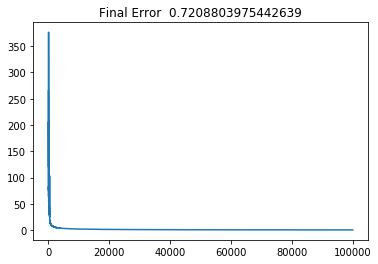

In [14]:
# Importing the Libraries
import numpy as np
from matplotlib import pyplot as plt
from math import exp
import math as math

## Defining the inputs
## hidden_in_each_layer is such that: the number of entries
# define the number of hidden layers and each entered value is the number of hidden units in that layer
(n_inputs,dimension,hidden_in_each_layer) =(200,1,[3,6,5,6,6,2]) 


## Setting the Training Data
train_input =np.reshape(np.random.randint(1,10,n_inputs),(n_inputs,1)) ## Randomly Genrated Inputs
y = 1*(train_input>5) 




# Initializing the Network
net = initialize_network(n_inputs,dimension, hidden_in_each_layer,train_input,y)

## Hyper Parameter Initialization
epochs= 100000
lr = 0.001
np.random.seed(1)
# net[0]
# print(net[1])


## Train
tr = train (net,epochs,lr)
# net[1]

# Plotting the Error
plt.title('Final Error  ' + str(tr[0][-1]))
plt.plot(tr[0])
plt.show()

### Plotting the Graphs 
<span style="color:red"></style>
**Red: Ground Truth Values **

<span style="color:blue"></style>
**Blue: Predicted Values**

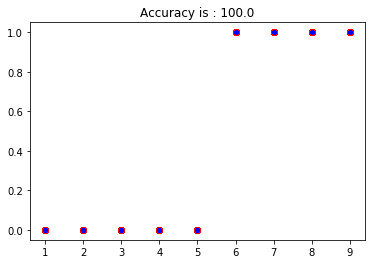

In [15]:
n_inputs = 200

## Plotting the Outputs vs Inputs
test_input =np.reshape(np.random.randint(1,10,n_inputs),(n_inputs,1)) ## Randomly Genrated Inputs
gtruth = 1*(test_input>5) 
    
plt.plot(test_input,gtruth,'r.',markersize=12)

# Caluclating Predictions from the network
predicted = np.round(feed_forward(test_input,tr[1],tr[2])['al'])
acc= np.mean(1*(gtruth == predicted))
plt.title('Accuracy is : '+ str(acc*100))
plt.plot(test_input,predicted,'b.')
plt.show()


# gtruth
# feed_forward(test_input,tr[1],tr[2])['al']

## Implementing for 1D input and wherein the output is linearly seperable about x= 25 and Margin is high.

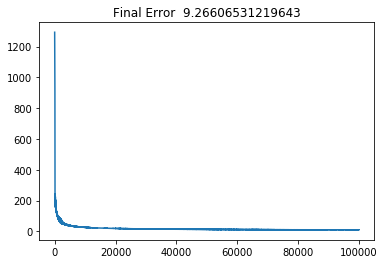

In [60]:
# Importing the Libraries
import numpy as np
from matplotlib import pyplot as plt
from math import exp

## Defining the inputs
## hidden_in_each_layer is such that: the number of entries
# define the number of hidden layers and each entered value is the number of hidden units in that layer
(n_inputs,dimension,hidden_in_each_layer) =(200,1,[4,2]) 


## Setting the Training Data
train_input =np.reshape(np.random.randint(1,50,n_inputs),(n_inputs,1)) ## Randomly Genrated Inputs
y = 1*(train_input>25) 

# Initializing the Network
net = initialize_network(n_inputs,dimension, hidden_in_each_layer,train_input,y)

## Hyper Parameter Initialization
epochs= 100000
lr = 0.0001
np.random.seed(1)
# net[0]
# print(net[1])

## Train
tr = train (net,epochs,lr)

# Plotting the Error
plt.title('Final Error  ' + str(tr[0][-1]))
plt.plot(tr[0])
plt.show()

### Plotting the Graphs 
<span style="color:red"></style>
**Red: Ground Truth Values **

<span style="color:blue"></style>
**Blue: Predicted Values**

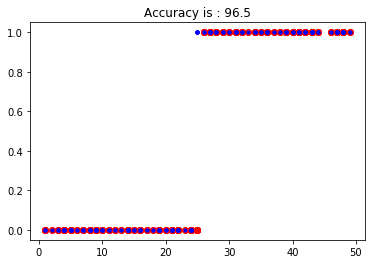

In [67]:
## Plotting the Outputs vs Inputs
test_input =np.reshape(np.random.randint(1,50,n_inputs),(n_inputs,1)) ## Randomly Genrated Inputs
gtruth = 1*(test_input>25) 

plt.plot(test_input,gtruth,'r.',markersize=12)

# Caluclating Predictions from the network
predicted = np.round(feed_forward(test_input,tr[1],tr[2])['al'])
acc= np.mean(1*(gtruth == predicted))
plt.title('Accuracy is : '+ str(acc*100))
plt.plot(test_input,predicted,'b.')
plt.show()


# gtruth
# feed_forward(test_input,tr[1],tr[2])['al']

## (a) Important Comaprisons when data is being separated between large and small margin.
#### For Small margin: (all x>5 = 1 && all x< 5 = 0)
epochs= 100,000, lr = 0.001; final error = 0.72 with 100 per accuracy.
#### For Large margin: (all x>25 = 1 && all x< 25 = 0)
epochs= 100,000, lr = 0.0001, final error = 9.2 with 96.5 per accuracy.

**From the above results, we can see that the higher the margin, the less is the accuracy and more is the error at the end of convergence.**

## Therefore a lower margin will take less time to converge than a higher margin input. 

(For this experiment, the hidden layers tuning is very important, even after repeated trials, I was only able to make the network converge with 2 hidden layers.


# Testing with data that is not linearly separable.

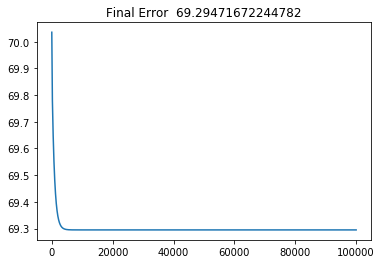

In [56]:
# Importing the Libraries
import numpy as np
from matplotlib import pyplot as plt
from math import exp

## Defining the inputs
## hidden_in_each_layer is such that: the number of entries
# define the number of hidden layers and each entered value is the number of hidden units in that layer
(n_inputs,dimension,hidden_in_each_layer) =(100,1,[1,1,1]) 


## Setting the Training Data
# Taking the function y= sin(x)
train_input =np.reshape(np.random.randint(1,50,n_inputs),(n_inputs,1)) ## Randomly Genrated Inputs
y = 1*(np.sin(train_input)>0) 

# Initializing the Network
net = initialize_network(n_inputs,dimension, hidden_in_each_layer,train_input,y)

## Hyper Parameter Initialization
epochs= 100000
lr = 0.0001
np.random.seed(1)
# net[0]
# print(net[1])

## Train
tr = train (net,epochs,lr)

# Plotting the Error
plt.title('Final Error  ' + str(tr[0][-1]))
plt.plot(tr[0])

plt.show()

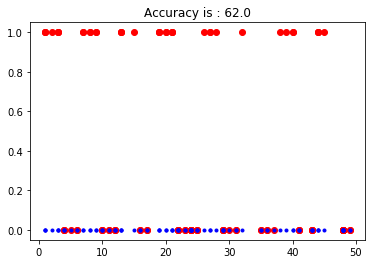

In [89]:
## Plotting the Outputs vs Inputs
test_input =np.reshape(np.random.randint(1,50,n_inputs),(n_inputs,1)) ## Randomly Genrated Inputs
gtruth = 1*(np.sin(test_input)>0) 

plt.plot(test_input,gtruth,'r.',markersize=12)

# Caluclating Predictions from the network
predicted = np.round(feed_forward(test_input,tr[1],tr[2])['al'])
acc= np.mean(1*(gtruth == predicted))
plt.title('Accuracy is : '+ str(acc*100))
plt.plot(test_input,predicted,'b.')
plt.show()


# gtruth
# feed_forward(test_input,tr[1],tr[2])['al']

For linearly inseparable data, I was unable to tune the network so that the error converge to zero. I was able to get a maximum convergence to error = 69.2 in 100,000 epochs and 0.0001 learning rate.

Also, we can see that the accuracy is as low as, 62 percent. Therefore, either we tune the network such that it converges better or we increase the number of dimensions and try.

** In all, it is much easier to converge linearly separable data than inseparabe data.**

# (b) For Higher Dimension of Input
## Linearly Separable Data

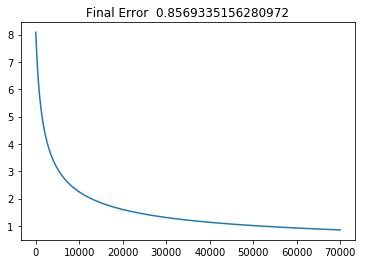

In [109]:
# Importing the Libraries
import numpy as np
from matplotlib import pyplot as plt
from math import exp

## Defining the inputs
## hidden_in_each_layer is such that: the number of entries
# define the number of hidden layers and each entered value is the number of hidden units in that layer
(n_inputs,dimension,hidden_in_each_layer) =(100,3,[2,1,1]) 


## Setting the Training Data
# Taking the function y= x1+x2+x3+c
train_input1 =np.reshape(np.random.randint(1,50,n_inputs),(n_inputs,1)) ## Randomly Genrated Inputs
train_input2 =np.reshape(np.random.randint(1,50,n_inputs),(n_inputs,1)) ## Randomly Genrated Inputs
train_input3 =np.reshape(np.random.randint(1,50,n_inputs),(n_inputs,1)) ## Randomly Genrated Inputs
train_input = np.concatenate((train_input1,train_input2,train_input3),axis=1)
# print(train_input.shape)
y = 1*((train_input1+train_input2+train_input3)>0)

# Initializing the Network
net = initialize_network(n_inputs,dimension, hidden_in_each_layer,train_input,y)

## Hyper Parameter Initialization
epochs= 70000
lr = 0.001
np.random.seed(1)
# net[0]
# print(net[1])

## Train
tr = train (net,epochs,lr)

# Plotting the Error
plt.title('Final Error  ' + str(tr[0][-1]))
plt.plot(tr[0])

plt.show()

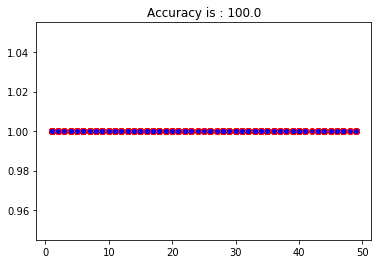

In [106]:
## Plotting the Outputs vs Inputs
# Taking the function y= x1+x2+x3+c
test_input1 =np.reshape(np.random.randint(1,50,n_inputs),(n_inputs,1)) ## Randomly Genrated Inputs
test_input2 =np.reshape(np.random.randint(1,50,n_inputs),(n_inputs,1)) ## Randomly Genrated Inputs
test_input3 =np.reshape(np.random.randint(1,50,n_inputs),(n_inputs,1)) ## Randomly Genrated Inputs
test_input = np.concatenate((train_input1,train_input2,train_input3),axis=1)
# print(train_input.shape)
y = 1*((test_input1+test_input2+test_input3)>0)

plt.plot(test_input,y,c='r', marker='o')

# Caluclating Predictions from the network
predicted = np.round(feed_forward(test_input,tr[1],tr[2])['al'])
acc= np.mean(1*(y == predicted))
plt.title('Accuracy is : '+ str(acc*100))
plt.plot(test_input,predicted,'b.')
plt.show()


# gtruth
# feed_forward(test_input,tr[1],tr[2])['al']

For Higher Dimensions, and linearly separable data, I was able to converge the network in 70,000 epochs using 3 hidden layers. The error is 0.8. Finding the parmaters were relatively easier for high dimension linearly separable data.

## Linearly Inseparable

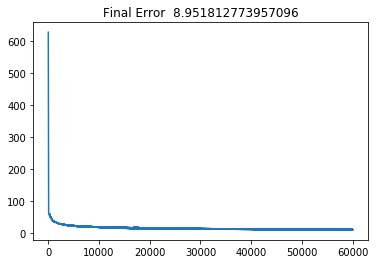

In [165]:
# Importing the Libraries
import numpy as np
from matplotlib import pyplot as plt
from math import exp

## Defining the inputs
## hidden_in_each_layer is such that: the number of entries
# define the number of hidden layers and each entered value is the number of hidden units in that layer
(n_inputs,dimension,hidden_in_each_layer) =(100,2,[2,4,4,2]) 


## Setting the Training Data
# Taking the function y= x1^2 + x^2 = r^2 (circle)
train_input1 =np.reshape(np.random.randint(1,50,n_inputs),(n_inputs,1)) ## Randomly Genrated Inputs
train_input2 =np.reshape(np.random.randint(1,50,n_inputs),(n_inputs,1)) ## Randomly Genrated Inputs
train_input = np.concatenate((train_input1,train_input2),axis=1)
# print(train_input.shape)
y = 1*((train_input1*train_input1+train_input2*train_input2-1500>0)) # predicting points outside the circle)
# Initializing the Network
net = initialize_network(n_inputs,dimension, hidden_in_each_layer,train_input,y)

## Hyper Parameter Initialization
epochs= 60000
lr = 0.001
np.random.seed(1)
# net[0]
# print(net[1])

## Train
tr = train (net,epochs,lr)

# Plotting the Error
plt.title('Final Error  ' + str(tr[0][-1]))
plt.plot(tr[0])

plt.show()

# train_input1


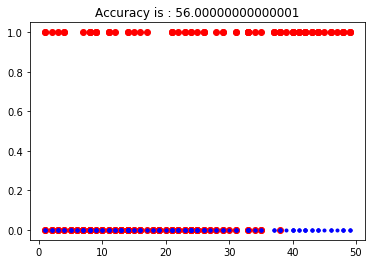

In [160]:
## Plotting the Outputs vs Inputs
# Taking the function y= x1^2 + x^2 = r^2 (circle)
test_input1 =np.reshape(np.random.randint(1,50,n_inputs),(n_inputs,1)) ## Randomly Genrated Inputs
test_input2 =np.reshape(np.random.randint(1,50,n_inputs),(n_inputs,1)) ## Randomly Genrated Inputs
test_input = np.concatenate((train_input1,train_input2),axis=1)
# print(train_input.shape)
y = 1*((train_input1*train_input1+train_input2*train_input2-1500>0)) # predicting points outside the circle)

plt.plot(test_input,y,'r.', marker='o')

# Caluclating Predictions from the network
predicted = np.round(feed_forward(test_input,tr[1],tr[2])['al'])
acc= np.mean(1*(y == predicted))
plt.title('Accuracy is : '+ str(acc*100))
plt.plot(test_input,predicted,'b.')
plt.show()


# gtruth
# feed_forward(test_input,tr[1],tr[2])['al']

For higher dimension, tuning is hyper paramters for linearly inseparable data is very difficult. After parameter tuning the network converged to an error of 8.95 with 60,000 epchs and 4 hidden layers. The accuracy is 56 percent. The error convergence is better than 1D linearly inseaprable data.


* **In conclusion, setting hyper paramters for linearly inseparable data is much difficlut and also the convergence time and accuracy is less.**
